In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK/TPRP_NIST_coelution/TPRP_NIST_PIF_01_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset,PIF
0,b1906_293T_proteinID_01A_QE3_122212.02394.02394.4,1,IEQSQHLFQAHK/4,0.182,0.009,[2],0,-0.004,14,0.086,...,0,0,(),Normal,Unk,Unk,0,209284145,NaN,0.0717
1,b1906_293T_proteinID_01A_QE3_122212.03022.03022.2,1,GLQTSQDAR/2,0.553,0.235,[2],0,-0.006,133,0.092,...,0,0,(),Normal,Unk,Unk,0,169140775,NaN,0.0475
2,b1906_293T_proteinID_01A_QE3_122212.03028.03028.3,1,VKELLTLIR/3,0.163,0.044,[2],0,0.339,2,0.141,...,0,0,(),Normal,Unk,Unk,0,508615594,NaN,0.0000
3,b1906_293T_proteinID_01A_QE3_122212.03425.03425.4,1,KVFAENKEIQK/4,0.193,0.059,[2],0,-0.002,3,0.134,...,0,0,(),Normal,Unk,Unk,0,264043982,NaN,0.0119
4,b1906_293T_proteinID_01A_QE3_122212.04209.04209.3,1,HLRPGTLR/3,0.533,0.340,[2],0,-0.005,21,0.094,...,0,0,(),Normal,Unk,Unk,0,195322905,NaN,0.0000


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK/TPRP_NIST_coelution/TPRP_NIST_PIF_01_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset,PIF
0,b1906_293T_proteinID_01A_QE3_122212.02036.02036.4,1,PKPFSDHLWFVVR/4,0.185,0.051,[2],0,-0.004,14,0.091,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q03111|ENL_HUMAN(pre=K,post=R)",989597763,0.0756
1,b1906_293T_proteinID_01A_QE3_122212.02609.02609.3,1,DHTQFAYR/3,0.222,0.040,[2],0,0.342,23,0.080,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P31751|AKT2_HUMAN(pre=K,post=L)",998256603,0.0000
2,b1906_293T_proteinID_01A_QE3_122212.02699.02699.4,1,DVDKYEKLVK/4,0.282,0.017,[2],0,0.254,4,0.210,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q01518|CAP1_HUMAN(pre=R,post=K)",975770940,0.0069
3,b1906_293T_proteinID_01A_QE3_122212.03721.03721.3,1,QLFLPKFIR/3,0.270,0.052,[2],0,0.340,5,0.146,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q14CZ7|FAKD3_HUMAN(pre=K,post=L)",727212875,0.0181
4,b1906_293T_proteinID_01A_QE3_122212.04112.04112.3,1,AQSTGGPAHGQER/3,0.183,0.007,[2],0,-0.001,64,0.077,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y6M1|IF2B2_HUMAN(pre=R,post=Q)",648315071,0.0570


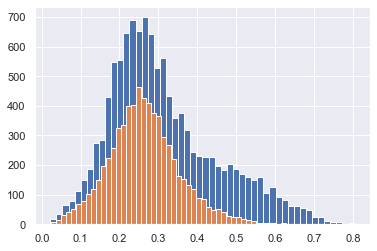

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.01566
0.012880000000000003


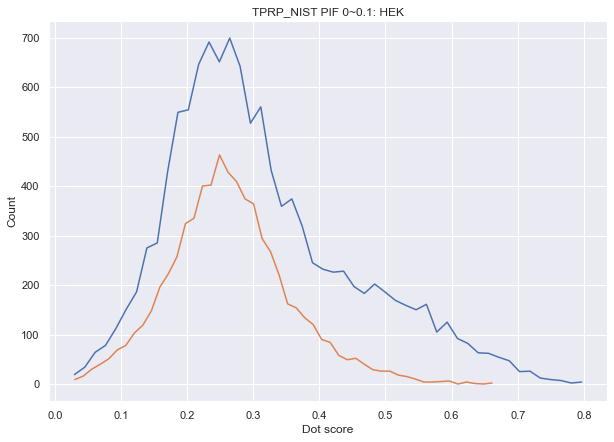

In [6]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('TPRP_NIST PIF 0~0.1: HEK')
plt.plot(nnt1[1][:-1] + 0.0075, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.006, nnd1[0])
plt.show()

In [7]:
print(len(NNt1))
print(len(NNd1))

11689
6712


In [8]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과

score:  0.6270000000000004
nnt:  340
nnd:  3
FDR:  0.008823529411764706

"""

score:  0.001
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.002
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.003
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.004
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.005
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.006
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.007
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.008
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.009000000000000001
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.010000000000000002
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.011000000000000003
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.012000000000000004
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.013000000000000005
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.014000000000000005
nnt:  11689
nnd:  6712
FDR:  0.5742150740011978


score:  0.0150

nnt:  11174
nnd:  6362
FDR:  0.5693574369071058


score:  0.1220000000000001
nnt:  11163
nnd:  6357
FDR:  0.569470572426767


score:  0.1230000000000001
nnt:  11149
nnd:  6353
FDR:  0.5698268903040632


score:  0.1240000000000001
nnt:  11134
nnd:  6342
FDR:  0.5696066103826118


score:  0.12500000000000008
nnt:  11120
nnd:  6332
FDR:  0.5694244604316546


score:  0.12600000000000008
nnt:  11106
nnd:  6320
FDR:  0.5690617684134702


score:  0.12700000000000009
nnt:  11098
nnd:  6316
FDR:  0.5691115516309245


score:  0.12800000000000009
nnt:  11088
nnd:  6306
FDR:  0.5687229437229437


score:  0.1290000000000001
nnt:  11077
nnd:  6298
FDR:  0.5685654960729439


score:  0.1300000000000001
nnt:  11057
nnd:  6290
FDR:  0.5688703988423623


score:  0.1310000000000001
nnt:  11045
nnd:  6282
FDR:  0.5687641466727026


score:  0.1320000000000001
nnt:  11027
nnd:  6267
FDR:  0.5683322753242043


score:  0.1330000000000001
nnt:  11016
nnd:  6258
FDR:  0.568082788671024


score:  0.13400000000000

nnt:  7656
nnd:  3985
FDR:  0.5205067920585162


score:  0.2410000000000002
nnt:  7616
nnd:  3953
FDR:  0.5190388655462185


score:  0.2420000000000002
nnt:  7576
nnd:  3912
FDR:  0.5163674762407603


score:  0.2430000000000002
nnt:  7546
nnd:  3874
FDR:  0.5133845746090644


score:  0.2440000000000002
nnt:  7501
nnd:  3845
FDR:  0.5125983202239701


score:  0.2450000000000002
nnt:  7455
nnd:  3809
FDR:  0.5109322602280348


score:  0.2460000000000002
nnt:  7405
nnd:  3769
FDR:  0.5089804186360567


score:  0.2470000000000002
nnt:  7363
nnd:  3731
FDR:  0.5067228032052152


score:  0.2480000000000002
nnt:  7327
nnd:  3693
FDR:  0.5040262044492971


score:  0.2490000000000002
nnt:  7271
nnd:  3653
FDR:  0.5024068216201348


score:  0.25000000000000017
nnt:  7226
nnd:  3623
FDR:  0.5013838915029062


score:  0.25100000000000017
nnt:  7192
nnd:  3595
FDR:  0.49986095661846497


score:  0.25200000000000017
nnt:  7155
nnd:  3560
FDR:  0.4975541579315164


score:  0.25300000000000017
nnt:  7

FDR:  0.2373968835930339


score:  0.3720000000000003
nnt:  3255
nnd:  762
FDR:  0.23410138248847925


score:  0.3730000000000003
nnt:  3229
nnd:  752
FDR:  0.23288943945493962


score:  0.3740000000000003
nnt:  3207
nnd:  742
FDR:  0.23136888057374494


score:  0.3750000000000003
nnt:  3178
nnd:  730
FDR:  0.22970421648835745


score:  0.3760000000000003
nnt:  3161
nnd:  720
FDR:  0.22777602024675736


score:  0.3770000000000003
nnt:  3141
nnd:  717
FDR:  0.2282712511938873


score:  0.3780000000000003
nnt:  3120
nnd:  708
FDR:  0.22692307692307692


score:  0.3790000000000003
nnt:  3104
nnd:  697
FDR:  0.22454896907216496


score:  0.3800000000000003
nnt:  3084
nnd:  685
FDR:  0.22211413748378728


score:  0.3810000000000003
nnt:  3073
nnd:  671
FDR:  0.21835340058574682


score:  0.3820000000000003
nnt:  3053
nnd:  662
FDR:  0.21683589911562398


score:  0.3830000000000003
nnt:  3034
nnd:  654
FDR:  0.21555702043506922


score:  0.3840000000000003
nnt:  3019
nnd:  643
FDR:  0.212984

nnt:  1404
nnd:  89
FDR:  0.0633903133903134


score:  0.5040000000000003
nnt:  1392
nnd:  87
FDR:  0.0625


score:  0.5050000000000003
nnt:  1383
nnd:  85
FDR:  0.06146059291395517


score:  0.5060000000000003
nnt:  1363
nnd:  82
FDR:  0.06016140865737344


score:  0.5070000000000003
nnt:  1354
nnd:  81
FDR:  0.05982274741506647


score:  0.5080000000000003
nnt:  1343
nnd:  79
FDR:  0.058823529411764705


score:  0.5090000000000003
nnt:  1333
nnd:  77
FDR:  0.05776444111027757


score:  0.5100000000000003
nnt:  1314
nnd:  75
FDR:  0.05707762557077625


score:  0.5110000000000003
nnt:  1303
nnd:  74
FDR:  0.056792018419033


score:  0.5120000000000003
nnt:  1289
nnd:  71
FDR:  0.05508145849495733


score:  0.5130000000000003
nnt:  1284
nnd:  69
FDR:  0.053738317757009345


score:  0.5140000000000003
nnt:  1273
nnd:  68
FDR:  0.05341712490180676


score:  0.5150000000000003
nnt:  1263
nnd:  66
FDR:  0.052256532066508314


score:  0.5160000000000003
nnt:  1253
nnd:  65
FDR:  0.0518754988

'\n결과\n'